## Observations and Insights 

Things I still need to fix: 
- the removing dups isn't working properly 
- my summary table is good except the column names are "Tumor Volume (mm3)" not the name of the series that I'm using
- My agg() method isn't working - the columns should be rows and Drug Regimen is missing
- My plot.bar() chart is showing all columns, i need just the one bar


In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(pd.unique(mouse_study_df['Mouse ID']))

249

In [6]:
# Dropping the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df.drop_duplicates(subset =("Mouse ID","Timepoint"),
                     keep = 'last')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_metadata_count = mouse_study_df.count()

len(pd.unique(mouse_study_df['Mouse ID']))

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_mean = summary_tumor_vol.mean()
s1 = summary_tumor_vol_mean["Tumor Volume (mm3)"]
s1.rename("Mean Tumor Volume") 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Mean Tumor Volume, dtype: float64

In [9]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_median = summary_tumor_vol.median()
s2 = summary_tumor_vol_median["Tumor Volume (mm3)"]
s2.rename("Median Tumor Volume") 

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Median Tumor Volume, dtype: float64

In [10]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_var = summary_tumor_vol.var()
s3 = summary_tumor_vol_var["Tumor Volume (mm3)"]
s3.rename("Tumor Volume Variance") 

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume Variance, dtype: float64

In [11]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_std = summary_tumor_vol.std()
s4 = summary_tumor_vol_std["Tumor Volume (mm3)"]
s4.rename("Tumor Volume Std. Dev") 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume Std. Dev, dtype: float64

In [12]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_sem = summary_tumor_vol.sem()
s5 = summary_tumor_vol_sem["Tumor Volume (mm3)"]
s5.rename("SEM of Tumor Volume") 

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: SEM of Tumor Volume, dtype: float64

In [13]:
sum_df = pd.concat([s1,s2,s3,s4,s5], axis=1)
sum_df

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_df.agg(['mean', 'median','var','std','sem'])

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
mean,50.976144,49.942960,47.708346,6.809671,0.499641
median,53.060651,51.819532,45.831020,6.766916,0.514641
var,31.599380,22.206987,257.831210,1.485251,0.010515
std,5.621333,4.712429,16.057123,1.218709,0.102544
sem,1.777621,1.490201,5.077708,0.385390,0.032427


## Bar and Pie Charts

In [15]:
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
#generate lists from the dataframes that give the drug list and count of timepoints tested 
mouse_study_df_g = mouse_study_df.groupby(["Drug Regimen"])
mouse_study_df_g = mouse_study_df_g.count()
drug_regimen = mouse_study_df_g.index.tolist()
timepointcount_by_drug = (mouse_study_df_g.iloc[:,4]).tolist()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


<IPython.core.display.Javascript object>


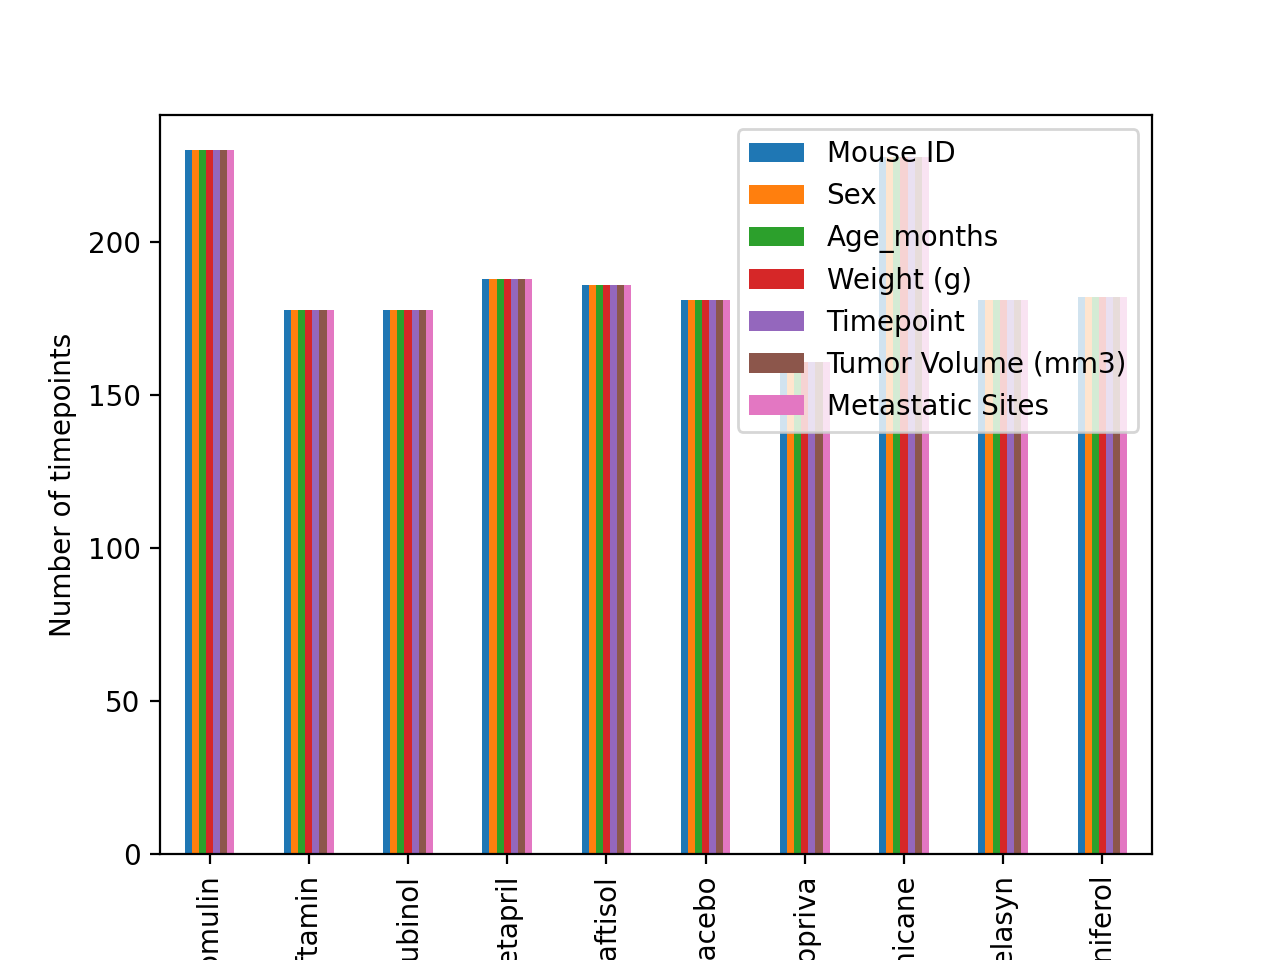

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#DataFrame.plot()  

#bar_chart = mouse_study_df_g.plot.bar(x="Drug Regimen",y="Timepoint")
bar_chart = mouse_study_df_g.plot.bar()
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of timepoints")
plt.show()


<IPython.core.display.Javascript object>


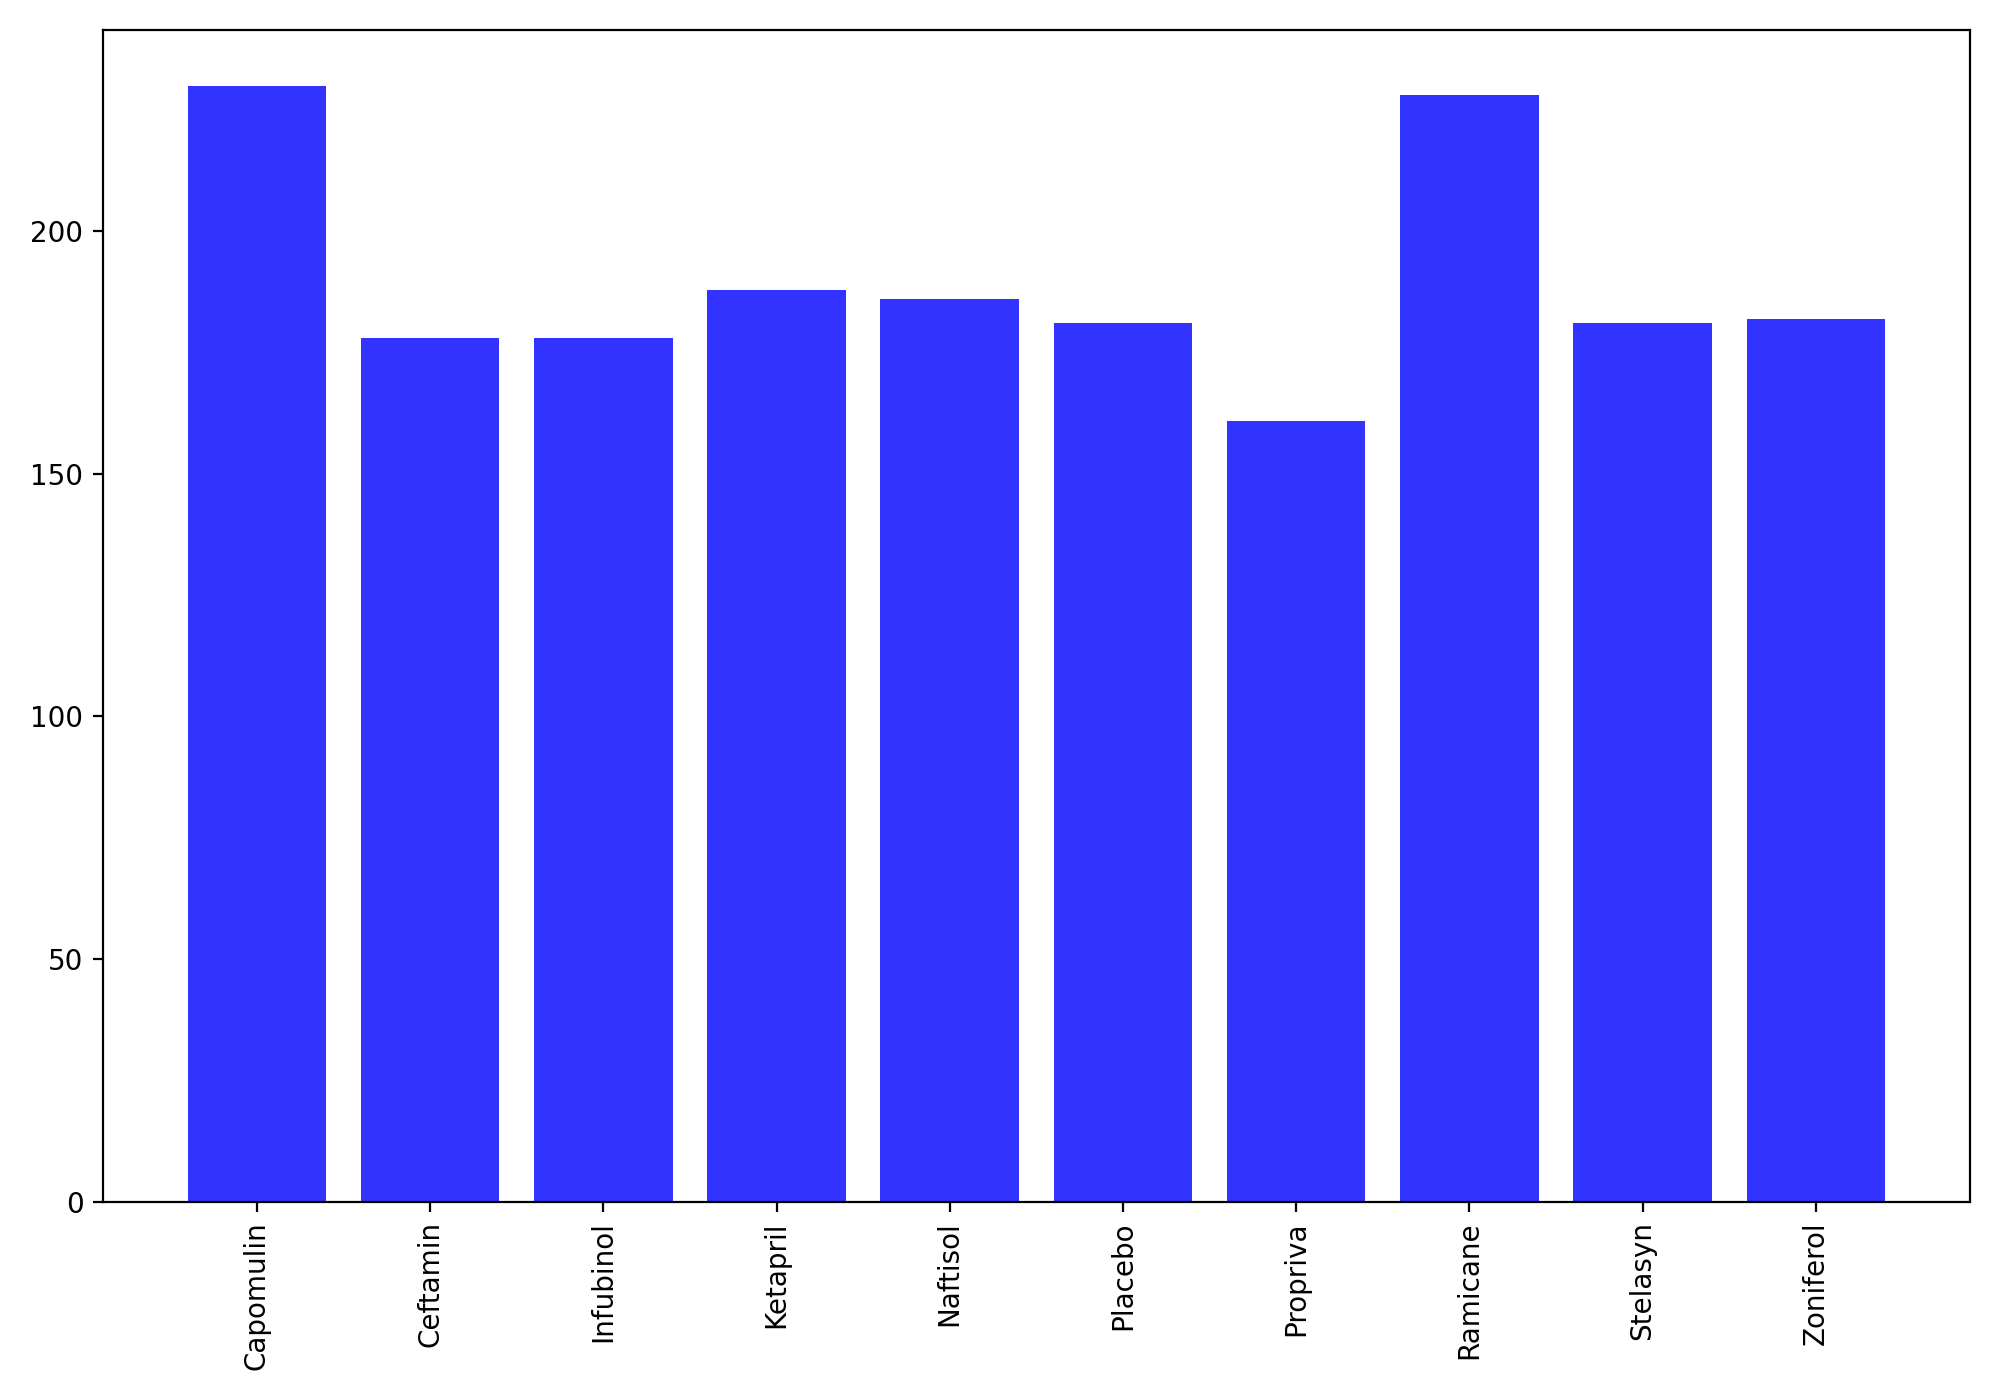

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#pyplot
x_axis = np.arange(len(timepointcount_by_drug))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,7))
plt.bar(x_axis, timepointcount_by_drug, color='b', alpha=0.8, align="center")
plt.xticks(tick_locations, drug_regimen, rotation = 'vertical')
plt.tight_layout()

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [25]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
    
# # Determine if there are any potential outliers in the average occupancy in California
# quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of occupancy is: {lowerq}")
# print(f"The upper quartile of occupancy is: {upperq}")
# print(f"The interquartile range of occupancy is: {iqr}")
# print(f"The the median of occupancy is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


# # pull out the outliers 
# outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
# outlier_occupancy
    

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# # Build a scatter plot for each data type
# plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# # Incorporate the other graph properties
# plt.title("Temperature in World Cities")
# plt.ylabel("Temperature (Celsius)")
# plt.xlabel("Latitude")
# plt.grid(True)

# # Save the figure
# plt.savefig("TemperatureInWorldCities.png")

# # Show plot
# plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# x_values = weather_data['lat']
# y_values = weather_data['temp']


# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,15),fontsize=15,color="green")
# plt.xlabel('Latitude')
# plt.ylabel('Temps')
# plt.show()
